# Number-of-studies-with-the-risk-factor-in-exclusion-and-inclusion-criteria


    - Check 21 Covid-19 risk factors ocurrance in inclusion criteria
    - Check 21 Covid-19 risk factors ocurrance in exclusion criteria
    - Using parsed results from Facebook Clinical-Trial-Parser

## 1. Importing and exploring parsed results 

In [1]:
import pandas as pd
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./data/ie_parsed_clinical_trials_11272020.tsv',sep='\t')
df.shape

(46714, 9)

In [3]:
df['#nct_id'].nunique()

3380

In [4]:
df.head(2)

,#nct_id,eligibility_type,criterion,label,term,ner_score,concepts,tree_numbers,nel_score
0,NCT04644705,inclusion,Healthy male or female subjects in good health...,word_scores:gender,male female,0.999,Men,M01.390,1.0
1,NCT04644705,inclusion,Healthy male or female subjects in good health...,word_scores:gender,male female,0.999,Women,M01.975,1.0


In [5]:
df = df.drop_duplicates(subset=['#nct_id', 'eligibility_type', 'concepts']).dropna(subset=['concepts']).reset_index(drop=True)

In [6]:
df.shape

(25538, 9)

## 2. Combining some concepts

Combine MEN

In [7]:
df.concepts = df.concepts.replace('Men|Multiple Endocrine Neoplasia Type 2a|Multiple Endocrine Neoplasia Type 2b','Men')

Combine Pregnancy

In [8]:
df[df.concepts.str.contains('Pregnancy')].concepts.value_counts()

Pregnancy                                                      1426
Pregnancy Tests                                                 225
Pregnancy, Unplanned                                              5
Hypertension, Pregnancy-Induced                                   2
Pregnancy Trimesters                                              1
Pregnancy in Adolescence                                          1
Pregnancy Complications|Pregnancy Complications, Infectious       1
Pregnancy, Multiple                                               1
Name: concepts, dtype: int64

In [9]:
df.concepts = df.concepts.replace('Pregnancy, Unplanned','Pregnancy')
df.concepts = df.concepts.replace('Pregnancy, Multiple','Pregnancy')

In [10]:
df[df.concepts.str.contains('Pregnancy')].concepts.value_counts()

Pregnancy                                                      1432
Pregnancy Tests                                                 225
Hypertension, Pregnancy-Induced                                   2
Pregnancy Trimesters                                              1
Pregnancy in Adolescence                                          1
Pregnancy Complications|Pregnancy Complications, Infectious       1
Name: concepts, dtype: int64

Combine Diabetes

In [11]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes Mellitus                                      206
Diabetes Mellitus, Type 1|Diabetes Mellitus, Type 2     36
Diabetes Mellitus, Type 1                                7
Diabetes Mellitus, Type 2                                6
Diabetes, Gestational                                    1
Diabetes Insipidus                                       1
Name: concepts, dtype: int64

In [12]:
df.concepts = df.concepts.replace('.*Diabetes.*','Diabetes',regex=True)

In [13]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes    257
Name: concepts, dtype: int64

Combine hypertension

In [14]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension                                                                                                             189
Hypertension, Pulmonary                                                                                                   41
Hypertension, Portal                                                                                                       9
Intracranial Hypertension                                                                                                  7
Pulmonary Arterial Hypertension                                                                                            5
Hypertension, Malignant                                                                                                    2
Hypertension, Pregnancy-Induced                                                                                            2
Familial Primary Pulmonary Hypertension|Idiopathic Pulmonary Arterial Hypertension|Pulmonary Hypertension, Primary, 1      2


In [15]:
df.concepts = df.concepts.str.replace('.*Hypertension.*','Hypertension',regex=True)

In [16]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension    257
Name: concepts, dtype: int64

Combine Liver disease

In [17]:
df[df.concepts.str.contains('Liver Diseases')].concepts.value_counts()

Liver Diseases               149
Liver Diseases, Alcoholic      3
Name: concepts, dtype: int64

In [18]:
df.concepts = df.concepts.str.replace('.*Liver Diseases.*','Liver Diseases',regex=True)

In [19]:
df[df.concepts.str.contains('Liver Diseases')].concepts.value_counts()

Liver Diseases    152
Name: concepts, dtype: int64

Combine CKD

In [20]:
df.concepts = df.concepts.str.replace('Renal Insufficiency, Chronic','Chronic Kidney Diseases',regex=False)

In [21]:
df[df.concepts.str.contains('Chronic Kidney Diseases')].concepts.value_counts()

Chronic Kidney Diseases    163
Name: concepts, dtype: int64

Combine Obesity

In [22]:
df[df.concepts.str.contains('Obesity')].concepts.value_counts()

Obesity|Obesity Management|Obesity, Morbid    70
Obesity, Morbid                                7
Obesity Hypoventilation Syndrome               1
Name: concepts, dtype: int64

In [23]:
df.concepts = df.concepts.str.replace('.*Obesity.*','Obesity',regex=True)

In [24]:
df[df.concepts.str.contains('Obesity')].concepts.value_counts()

Obesity    78
Name: concepts, dtype: int64

Combine serious heart condition

In [25]:
df[df.concepts.str.contains('Heart Failure')].concepts.value_counts()

Heart Failure                158
Congestive Heart Failure      87
Heart Failure, Systolic        3
Heart Failure, Left-Sided      1
Heart Failure, Diastolic       1
Name: concepts, dtype: int64

In [26]:
df[df.concepts.str.contains('Coronary Artery Disease')].concepts.value_counts()

Coronary Artery Disease    45
Name: concepts, dtype: int64

In [27]:
df[df.concepts.str.contains('Cardiomyopathies')].concepts.value_counts()

Cardiomyopathies    31
Name: concepts, dtype: int64

In [28]:
df.concepts = df.concepts.str.replace('.*Heart Failure.*','Serious Heart Condition',regex=True)

In [29]:
df.concepts = df.concepts.str.replace('Coronary Artery Disease','Serious Heart Condition',regex=False)

In [30]:
df.concepts = df.concepts.str.replace('Cardiomyopathies','Serious Heart Condition',regex=False)

In [31]:
df[df.concepts.str.contains('Serious Heart Condition')].concepts.value_counts()

Serious Heart Condition    326
Name: concepts, dtype: int64

Combine Cerebrovascular Disorder

In [32]:
df[df.concepts.str.contains('Cerebrovascular Disorders')].concepts.value_counts()

Cerebrovascular Disorders    19
Name: concepts, dtype: int64

In [33]:
df[df.concepts.str.contains('Stroke')].concepts.value_counts()

Stroke           101
Stroke, Acute      9
Name: concepts, dtype: int64

In [34]:
df.concepts = df.concepts.str.replace('.*Stroke.*','Cerebrovascular Disorders',regex=True)

In [35]:
df[df.concepts.str.contains('Cerebrovascular Disorders')].concepts.value_counts()

Cerebrovascular Disorders    129
Name: concepts, dtype: int64

Weak immune 2

In [36]:
df.concepts = df.concepts.str.replace('.*HIV.*','Weak_immune_2',regex=True)
df.concepts = df.concepts.str.replace('Bone Marrow Transplantation','Weak_immune_2',regex=False)
df.concepts = df.concepts.str.replace('Blood Marrow Transplantation','Weak_immune_2',regex=False)
df.concepts = df.concepts.str.replace('Immune Deficiencies','Weak_immune_2',regex=False)
df.concepts = df.concepts.str.replace('Medicines','Weak_immune_2',regex=False)

In [37]:
df[df.concepts.str.contains('Weak_immune_2')].concepts.value_counts()

Weak_immune_2    440
Name: concepts, dtype: int64

Sickle_cell_disease


In [38]:
df[df.concepts.str.contains('Anemia')].concepts.value_counts()

Anemia, Sickle Cell              29
Anemia                           28
Anemia, Aplastic                  4
Anemia, Hemolytic, Autoimmune     2
Anemia, Hemolytic                 1
Fanconi Anemia                    1
Name: concepts, dtype: int64

In [39]:
df.concepts = df.concepts.str.replace('.*Anemia.*','Sickle Cell Diseases',regex=True)

In [40]:
df[df.concepts.str.contains('Sickle Cell Diseases')].concepts.value_counts()

Sickle Cell Diseases    65
Name: concepts, dtype: int64

Asthma

In [41]:
df[df.concepts.str.contains('Asthma')].concepts.value_counts()

Asthma                      152
Asthma, Exercise-Induced      2
Name: concepts, dtype: int64

In [42]:
df.concepts = df.concepts.str.replace('.*Asthma.*','Asthma',regex=True)

In [43]:
df[df.concepts.str.contains('Asthma')].concepts.value_counts()

Asthma    154
Name: concepts, dtype: int64

Weak immune 1

In [44]:
df[df.concepts.str.contains('Organ Transplantation')].concepts.value_counts()

Organ Transplantation    10
Name: concepts, dtype: int64

In [45]:
df.concepts = df.concepts.str.replace('.*Organ Transplantation.*','Weak_immune_1',regex=True)

In [46]:
df[df.concepts.str.contains('Weak_immune_1')].concepts.value_counts()

Weak_immune_1    10
Name: concepts, dtype: int64

Neurological_disorder

In [47]:
df[df.concepts.str.contains('Dementia')].concepts.value_counts()

Dementia                    52
Frontotemporal Dementia      1
Clinical Dementia Rating     1
Name: concepts, dtype: int64

In [48]:
df.concepts = df.concepts.str.replace('.*Dementia.*','Neurological Disorder',regex=True)

In [49]:
df[df.concepts.str.contains('Neurological Disorder')].concepts.value_counts()

Neurological Disorder    54
Name: concepts, dtype: int64

Thalassemia

In [50]:
df[df.concepts.str.contains('Thalassemia')].concepts.value_counts()

Thalassemia          8
Thalassemia Major    1
beta-Thalassemia     1
alpha-Thalassemia    1
Name: concepts, dtype: int64

In [51]:
df.concepts = df.concepts.str.replace('.*Thalassemia.*','Thalassemia',regex=True)

In [52]:
df[df.concepts.str.contains('Thalassemia')].concepts.value_counts()

Thalassemia    11
Name: concepts, dtype: int64

COPD

In [53]:
df[df.concepts.str.contains('Pulmonary Disease, Chronic Obstructive')].concepts.value_counts()

Pulmonary Disease, Chronic Obstructive    170
Name: concepts, dtype: int64

In [54]:
df.concepts = df.concepts.str.replace('Pulmonary Disease, Chronic Obstructive','COPD',regex=True)

In [55]:
df[df.concepts.str.contains('COPD')].concepts.value_counts()

COPD    170
Name: concepts, dtype: int64

Pulmonary Fibrosis

In [56]:
df[df.concepts.str.contains('Pulmonary Fibrosis')].concepts.value_counts()

Pulmonary Fibrosis               20
Idiopathic Pulmonary Fibrosis    13
Name: concepts, dtype: int64

In [57]:
df.concepts = df.concepts.str.replace('.*Pulmonary Fibrosis.*','Pulmonary Fibrosis',regex=True)

In [58]:
df[df.concepts.str.contains('Pulmonary Fibrosis')].concepts.value_counts()

Pulmonary Fibrosis    33
Name: concepts, dtype: int64

## 3. Spliting inclusion and exclusion criteria

In [59]:
# Inclusion criteria
df11 = df[df.eligibility_type == 'inclusion'].reset_index(drop=True)
# Exclusion criteria
df12 = df[df.eligibility_type == 'exclusion'].reset_index(drop=True)

In [60]:
df12.shape

(18650, 9)

In [61]:
df12['#nct_id'].nunique()

2469

In [62]:
df12.head()

,#nct_id,eligibility_type,criterion,label,term,ner_score,concepts,tree_numbers,nel_score
0,NCT04644705,exclusion,pregnant or lactating women,word_scores:pregnancy,pregnant,0.999,Pregnancy,G08.686.784.769,1.0
1,NCT04644705,exclusion,pregnant or lactating women,word_scores:gender,women,0.997,Women,M01.975,1.0
2,NCT04644276,exclusion,Pre-existing allergy to tape or adhesive,word_scores:allergy_name,tape adhesive,0.995,Adhesives,D27.720.013,1.0
3,NCT04644276,exclusion,pregnant (for females of childbearing age),word_scores:pregnancy,pregnant,0.991,Pregnancy,G08.686.784.769,1.0
4,NCT04644276,exclusion,pregnant (for females of childbearing age),word_scores:gender,females,0.996,Women,M01.975,1.0


In [63]:
df12.concepts.value_counts()

Pregnancy                                 1315
Women                                      630
Therapeutics                               394
Weak_immune_2                              386
COVID-19                                   294
                                          ... 
Ventilators, Mechanical                      1
Antibodies, Antineutrophil Cytoplasmic       1
Language Fluency, Arabic                     1
Vertigo                                      1
ECOG                                         1
Name: concepts, Length: 1903, dtype: int64

### 3.1   Importing risk factor list

In [64]:
dfd =pd.read_excel('./data/Risk_factor_list.xlsx')
dfd

,Risk factors,CUI,Query,Concept
0,Old age,"C0231337,C1999167",Old_age,Aging
1,Males,C0086582,Males,Men
2,Chronic kidney disease,"C1561643,C4075517,C4553188,C4075526",Chronic Kidney Diseases,Chronic Kidney Diseases
3,COPD,C0024117,COPD,COPD
4,Lung cancer,"C0684249,C0242379,C1306460",Lung_cancer,Lung Cancer
5,Immunocompromised state (weakened immune syste...,"C0029216,C0524930",Weak_immune_1,Weak_immune_1
6,Obesity,"C0028754,C1963185",Obesity,Obesity
7,"Serious heart conditions, such as heart failur...","C0018802,C4554158,C0018801,C0010054,C1956346,C...",Serious_heart_diseases,Serious Heart Condition
8,Sickle cell disease,C0002895,Sickle_cell_disease,Sickle Cell Diseases
9,Asthma,C0004096,Asthma,Asthma


In [65]:
risk_factor = list(dfd.Concept)
risk_factor

['Aging',
 'Men',
 'Chronic Kidney Diseases',
 'COPD',
 'Lung Cancer',
 'Weak_immune_1',
 'Obesity',
 'Serious Heart Condition',
 'Sickle Cell Diseases',
 'Asthma',
 'Neurological Disorder',
 'Cerebrovascular Disorders',
 'Cystic Fibrosis',
 'Hypertension',
 'Weak_immune_2',
 'Pregnancy',
 'Liver Diseases',
 'Pulmonary Fibrosis',
 'Smoking',
 'Diabetes',
 'Thalassemia']

### 3.2  Risk factors in exclusion criteria

In [66]:
df122 = df12[df12.concepts.isin(dfd.Concept)].reset_index(drop=True)

In [67]:
df122.concepts.value_counts()

Pregnancy                    1315
Weak_immune_2                 386
Serious Heart Condition       265
Hypertension                  185
Diabetes                      148
Liver Diseases                147
Chronic Kidney Diseases       138
Asthma                        125
COPD                          125
Cerebrovascular Disorders     109
Men                            97
Sickle Cell Diseases           56
Neurological Disorder          50
Pulmonary Fibrosis             28
Obesity                        28
Lung Cancer                    17
Cystic Fibrosis                17
Thalassemia                    11
Weak_immune_1                   9
Name: concepts, dtype: int64

In [68]:
# This is to display some risk factors with value 0
dic1 = df122.concepts.value_counts()
for rf in risk_factor:
    if rf not in dic1.keys():
        print(rf)
        dic1[rf] = 0
dic1

Aging
Smoking


Pregnancy                    1315
Weak_immune_2                 386
Serious Heart Condition       265
Hypertension                  185
Diabetes                      148
Liver Diseases                147
Chronic Kidney Diseases       138
Asthma                        125
COPD                          125
Cerebrovascular Disorders     109
Men                            97
Sickle Cell Diseases           56
Neurological Disorder          50
Pulmonary Fibrosis             28
Obesity                        28
Lung Cancer                    17
Cystic Fibrosis                17
Thalassemia                    11
Weak_immune_1                   9
Aging                           0
Smoking                         0
Name: concepts, dtype: int64

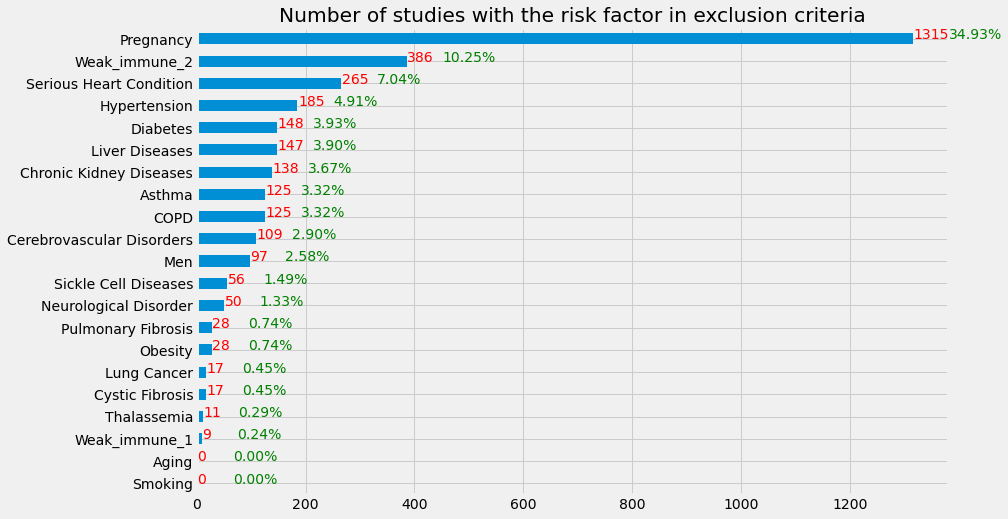

In [69]:
fig1 = plt.figure(figsize=(12,8))
dic1.sort_values().plot.barh()
plt.title('Number of studies with the risk factor in exclusion criteria')
for i,v in enumerate(dic1.sort_values()):
    plt.text(v + 1, i , str(v), color = 'red')
    plt.text(v + 66, i , ("{:.2%}".format(v/3765)), color = 'green')

In [70]:
fig1.savefig("./data/risk_factor_in_exclusion.png", dpi=300, bbox_inches = "tight")

### 3.3  Risk factors in inclusion criteria

In [71]:
df11.shape

(6888, 9)

In [72]:
df11 = df11.dropna(subset=['concepts']).reset_index(drop=True)
df11.shape

(6888, 9)

In [73]:
df111= df11[df11.concepts.isin(dfd.Concept)].reset_index(drop=True)

In [74]:
dic2 = df111.concepts.value_counts()

In [75]:
for rf in risk_factor:
    if rf not in dic2.keys():
        print(rf)
        dic2[rf] = 0
dic2

Aging
Smoking
Thalassemia


Men                          575
Pregnancy                    117
Diabetes                     109
Hypertension                  72
Serious Heart Condition       61
Weak_immune_2                 54
Obesity                       50
COPD                          45
Asthma                        29
Chronic Kidney Diseases       25
Cerebrovascular Disorders     20
Sickle Cell Diseases           9
Pulmonary Fibrosis             5
Liver Diseases                 5
Lung Cancer                    4
Neurological Disorder          4
Cystic Fibrosis                3
Weak_immune_1                  1
Aging                          0
Smoking                        0
Thalassemia                    0
Name: concepts, dtype: int64

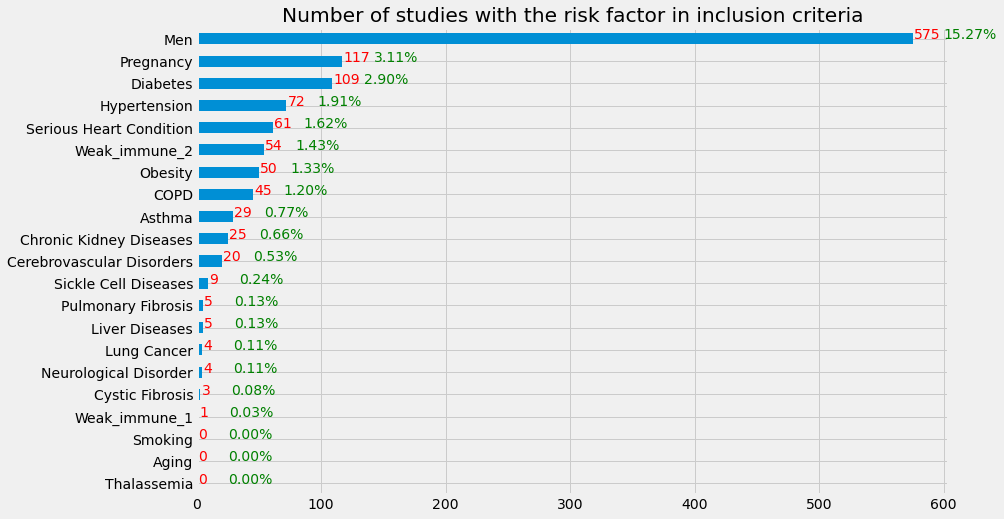

In [76]:
fig2 = plt.figure(figsize=(12,8))
dic2.sort_values().plot.barh()
plt.title('Number of studies with the risk factor in inclusion criteria')
for i,v in enumerate(dic2.sort_values()):
    plt.text(v + 1, i , str(v), color = 'red')
    plt.text(v + 25, i , ("{:.2%}".format(v/3765)), color = 'green')

In [77]:
fig2.savefig("./data/risk_factor_in_inclusion.png", dpi=300, bbox_inches = "tight")